In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sps
import Lab2Functions as ekg

## Importieren der Ruhe-EKG Daten

In [2]:
#Daten Markus
df_01 = pd.read_csv('data/Lab2_Aufgabe4_Markus.csv', sep = ';')
df_01 = df_01.dropna()
time_01 = df_01['time'] / 1000
ecg_01 = df_01['mV']
#Daten Jannis
df_02 = pd.read_csv('data/Lab2_Aufgabe4_Jannis.csv', sep = ';')
df_02 = df_02.dropna()
time_02 = df_02['time'] / 1000
ecg_02 = df_02['mV']
#Daten Matti
df_03 = pd.read_csv('data/Lab2_Aufgabe4_Matti.csv', sep = ';')
df_03 = df_03.dropna()
time_03 = df_03['time'] / 1000
ecg_03 = df_03['mV']
#Daten Juian
df_04 = pd.read_csv('data/Lab2_Aufgabe4_Julian.csv', sep = ';')
df_04 = df_04.dropna()
time_04 = df_04['time'] / 1000
time_04 = time_04 - time_04[0]
ecg_04 = df_04['mV']

## Filtern der Daten um das Rauschen zu minimieren

In [3]:
def butter_lowpass_filter(Wn, ecg): # Wn = 2*fg / fs)
    b , a = sps.butter(4, Wn, 'low', analog=False) 
    ecg_filtered = sps.filtfilt(b, a, ecg)
    return ecg_filtered

ecg_filtered_01 = butter_lowpass_filter(0.16, ecg_01)
ecg_filtered_02 = butter_lowpass_filter(0.16, ecg_02) 
ecg_filtered_03 = butter_lowpass_filter(0.16, ecg_03) 
ecg_filtered_04 = butter_lowpass_filter(0.16, ecg_04)

## Plotten der Daten gefiltert gegen orginal

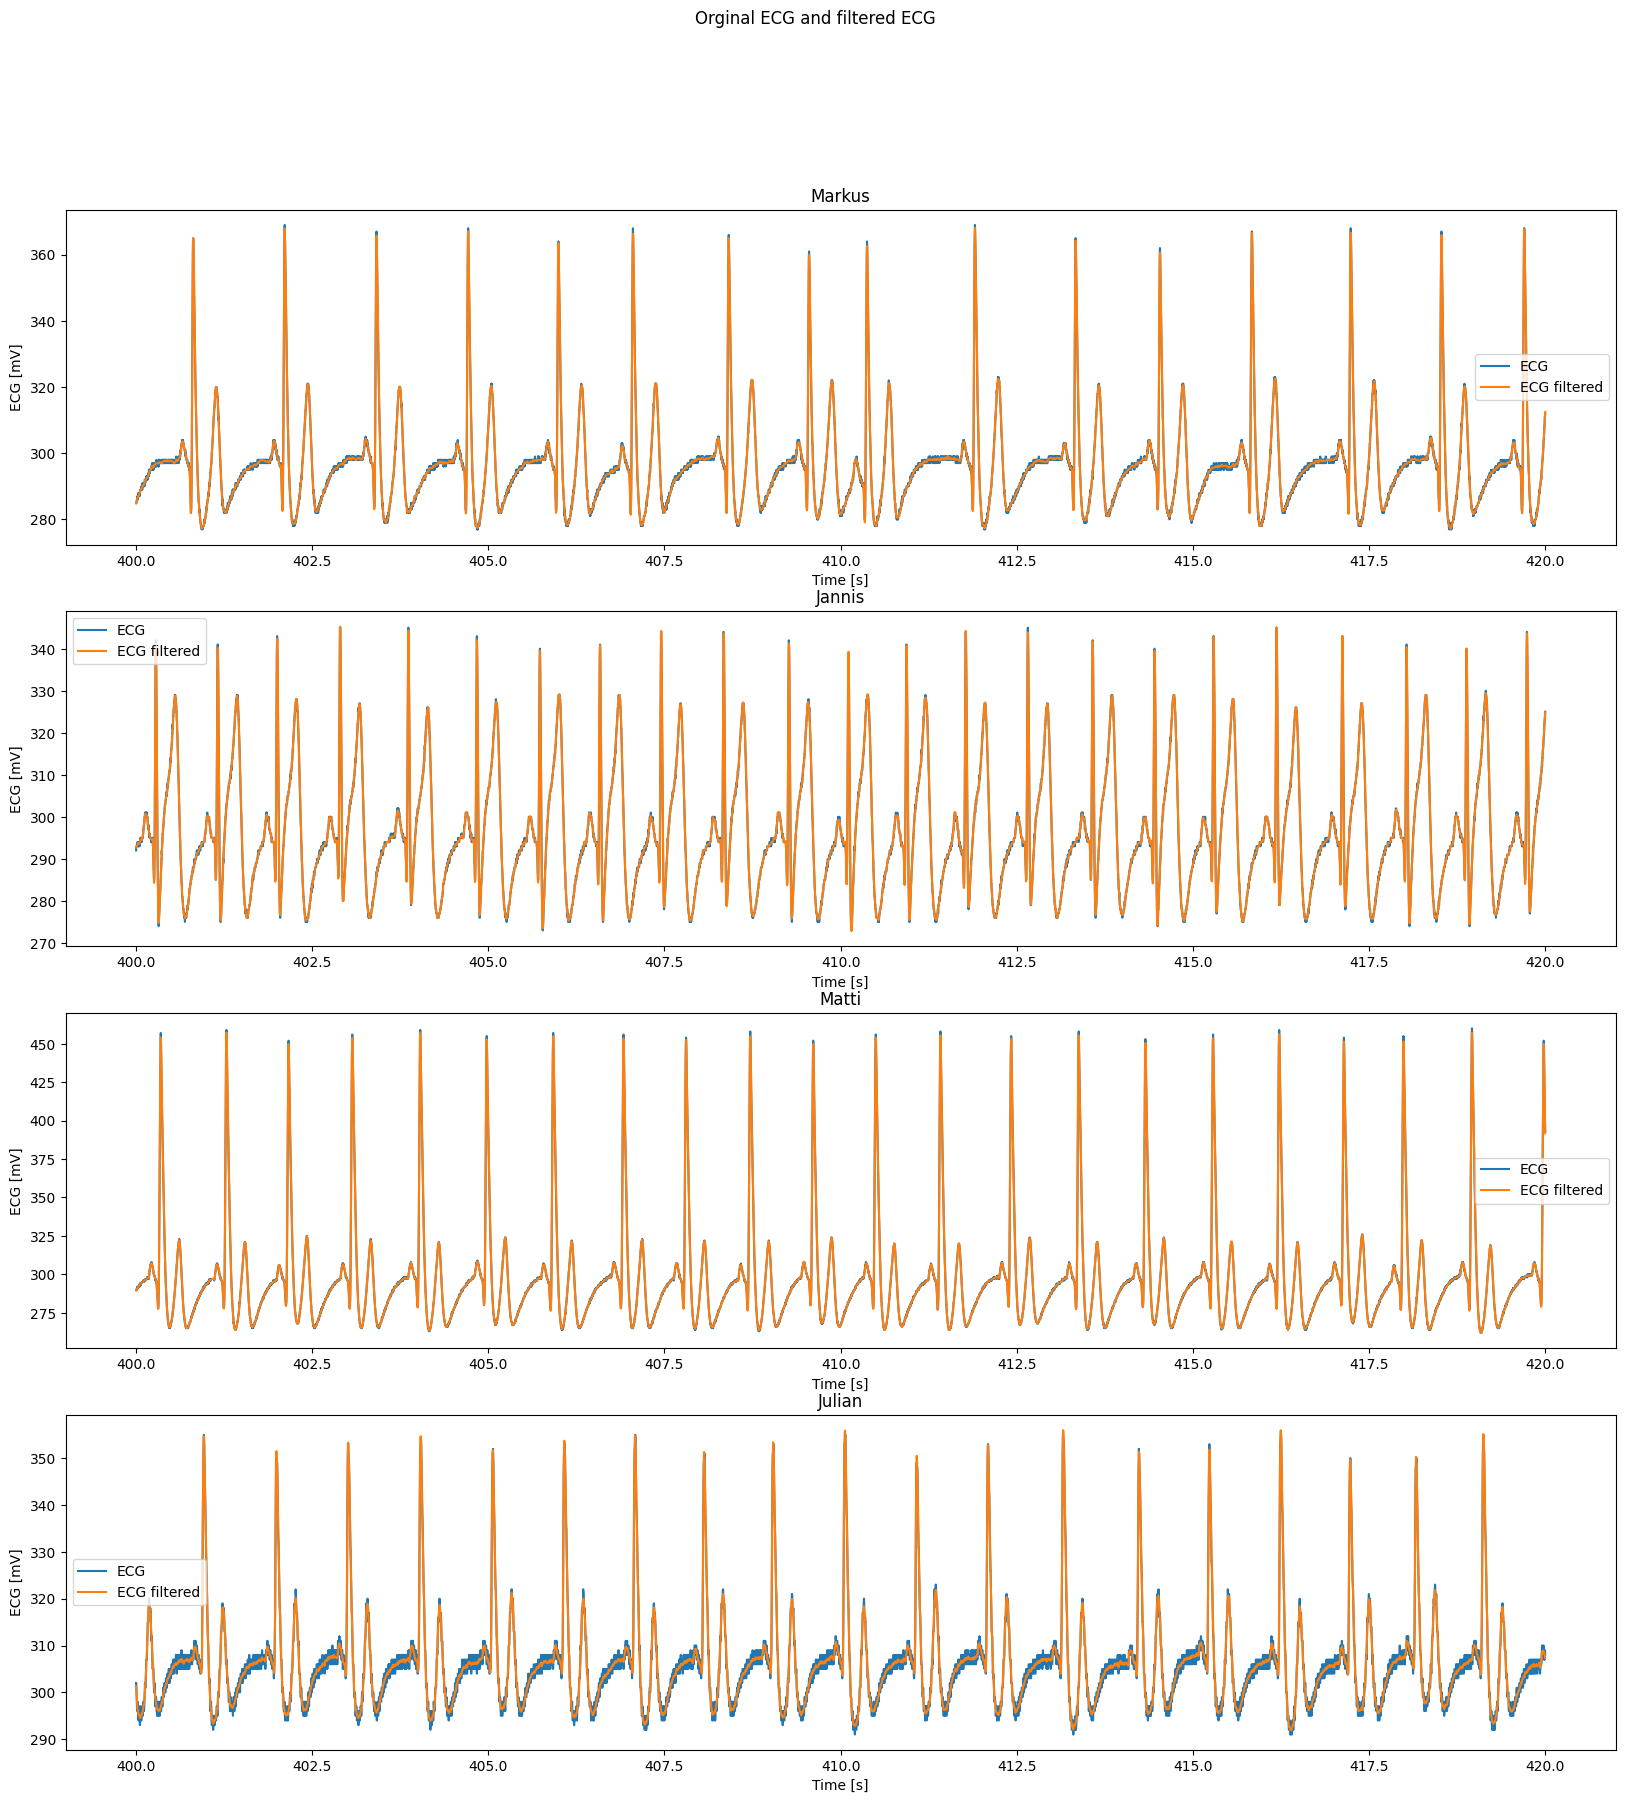

In [4]:
time_plot = np.where(np.logical_and(time_01 > 400 ,time_01 < 420))[0] #Zeitfenster des Plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
fig.suptitle('Orginal ECG and filtered ECG')
#Plotten Daten Markus
ax1.plot(time_01[time_plot], ecg_01[time_plot], label='ECG')
ax1.plot(time_01[time_plot], ecg_filtered_01[time_plot], label='ECG filtered')
ax1.set_title('Markus')
ax1.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax1.legend()
#Plotten Daten Jannis
ax2.plot(time_02[time_plot], ecg_02[time_plot], label='ECG')
ax2.plot(time_02[time_plot], ecg_filtered_02[time_plot], label='ECG filtered')
ax2.set_title('Jannis')
ax2.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax2.legend()
#Plotten Daten Matti
ax3.plot(time_03[time_plot], ecg_03[time_plot], label='ECG')
ax3.plot(time_03[time_plot], ecg_filtered_03[time_plot], label='ECG filtered')
ax3.set_title('Matti')
ax3.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax3.legend()
#Plotten Daten Julian
ax4.plot(time_04[time_plot], ecg_04[time_plot], label='ECG')
ax4.plot(time_04[time_plot], ecg_filtered_04[time_plot], label='ECG filtered')
ax4.set_title('Julian')
ax4.set(xlabel='Time [s]', ylabel='ECG [mV]')
ax4.legend()

## Aufgabe 3

[Text(0.5, 0, 'Zeit [s]'), Text(0, 0.5, 'EKG [mV]')]

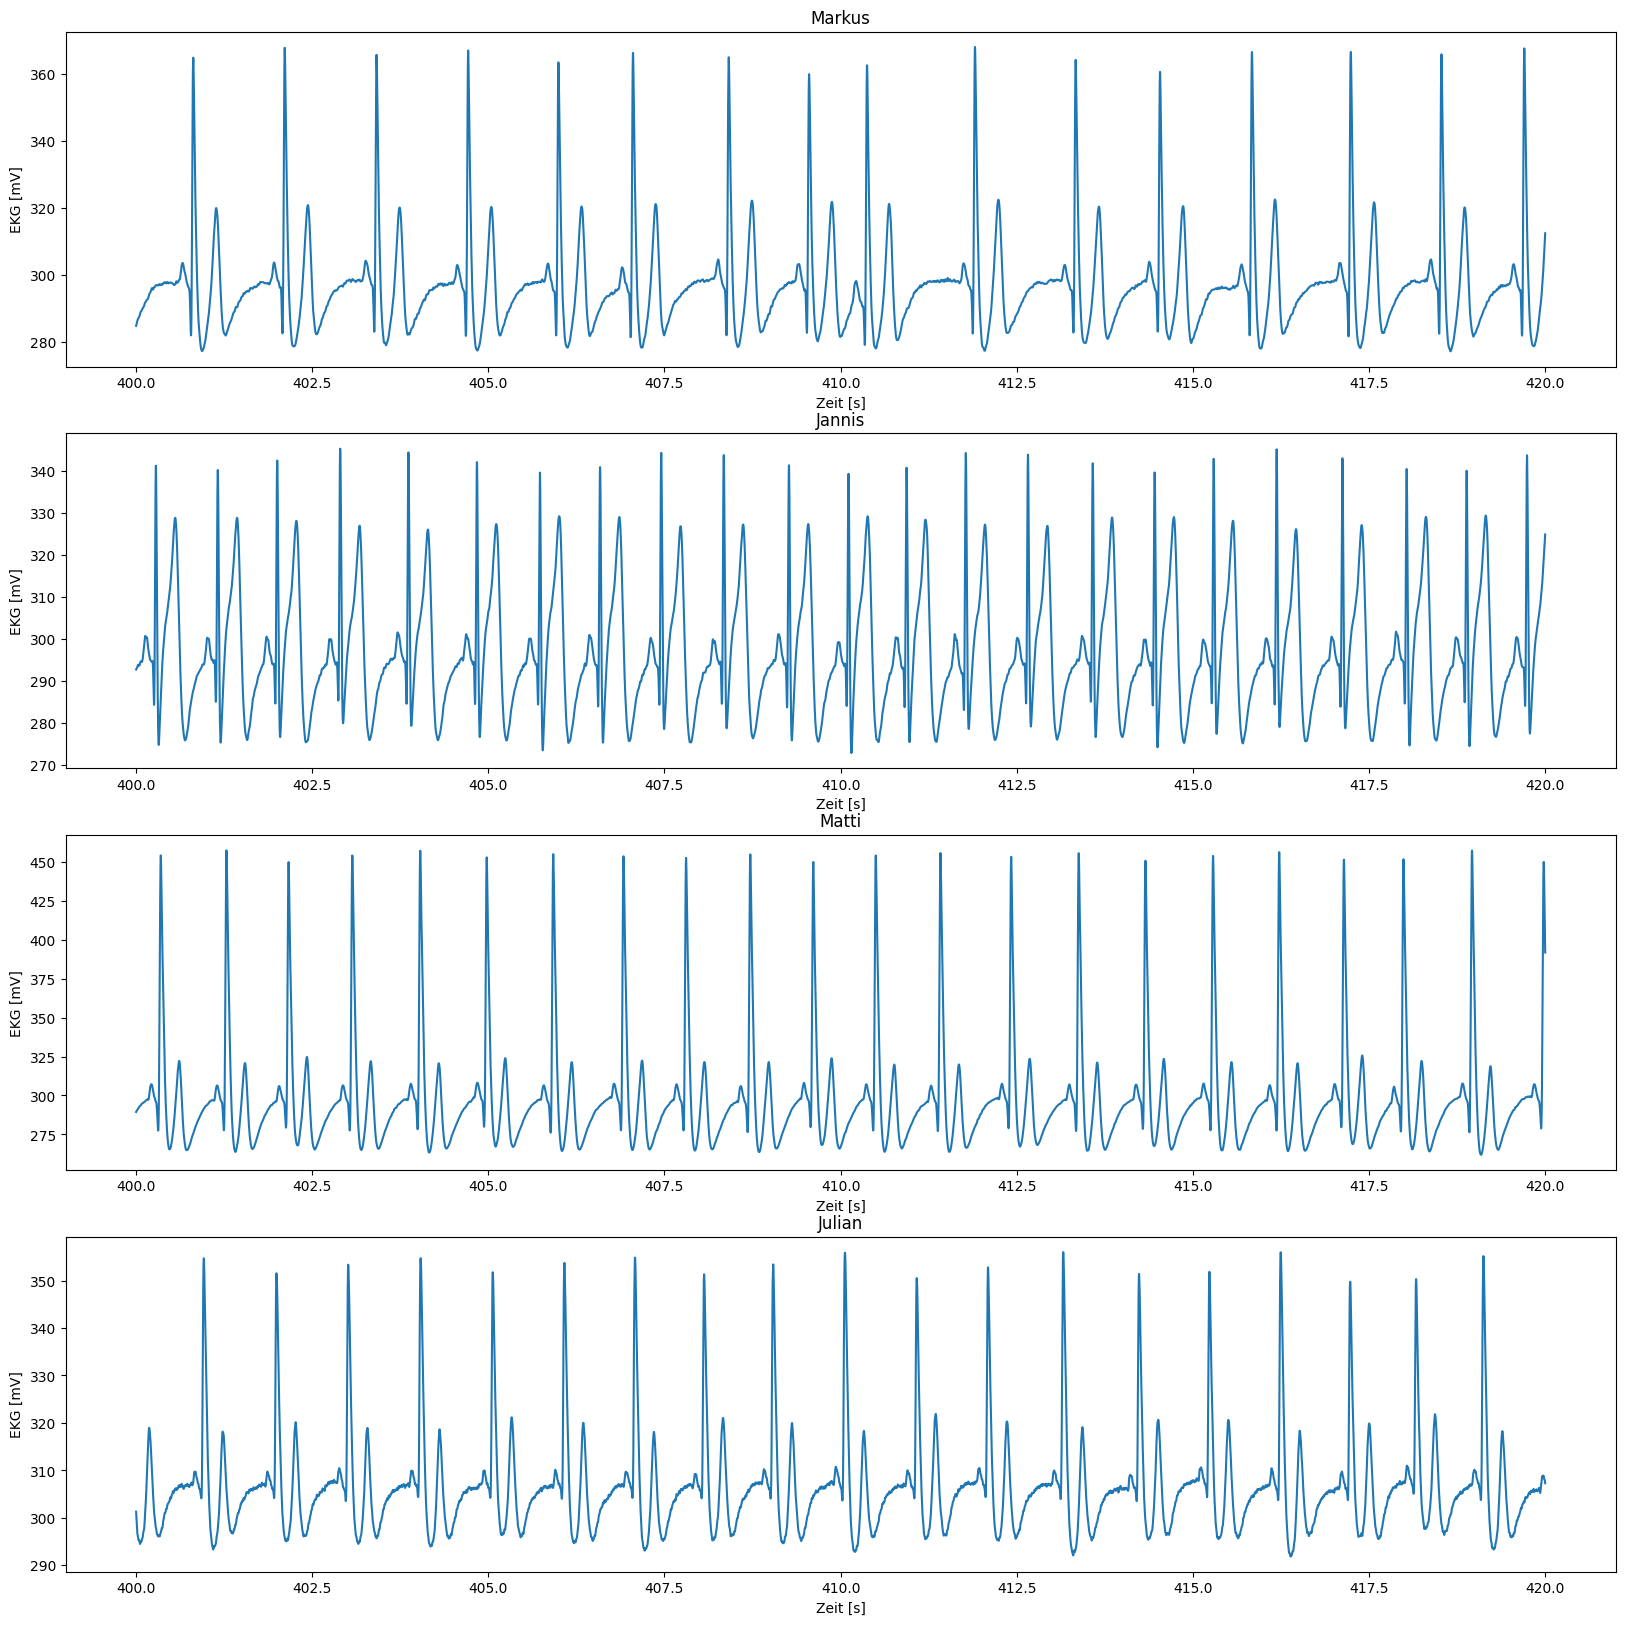

In [5]:
time_plot = np.where(np.logical_and(time_01 > 400 ,time_01 < 420))[0] #Zeitfenster des Plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20))
#Plotten Daten Markus
ax1.plot(time_01[time_plot], ecg_filtered_01[time_plot], label='ECG filtered')
ax1.set_title('Markus')
ax1.set(xlabel='Zeit [s]', ylabel='EKG [mV]')
#Plotten Daten Jannis
ax2.plot(time_02[time_plot], ecg_filtered_02[time_plot], label='ECG filtered')
ax2.set_title('Jannis')
ax2.set(xlabel='Zeit [s]', ylabel='EKG [mV]')
#Plotten Daten Matti
ax3.plot(time_03[time_plot], ecg_filtered_03[time_plot], label='ECG filtered')
ax3.set_title('Matti')
ax3.set(xlabel='Zeit [s]', ylabel='EKG [mV]')
#Plotten Daten Julian
ax4.plot(time_04[time_plot], ecg_filtered_04[time_plot], label='ECG filtered')
ax4.set_title('Julian')
ax4.set(xlabel='Zeit [s]', ylabel='EKG [mV]')

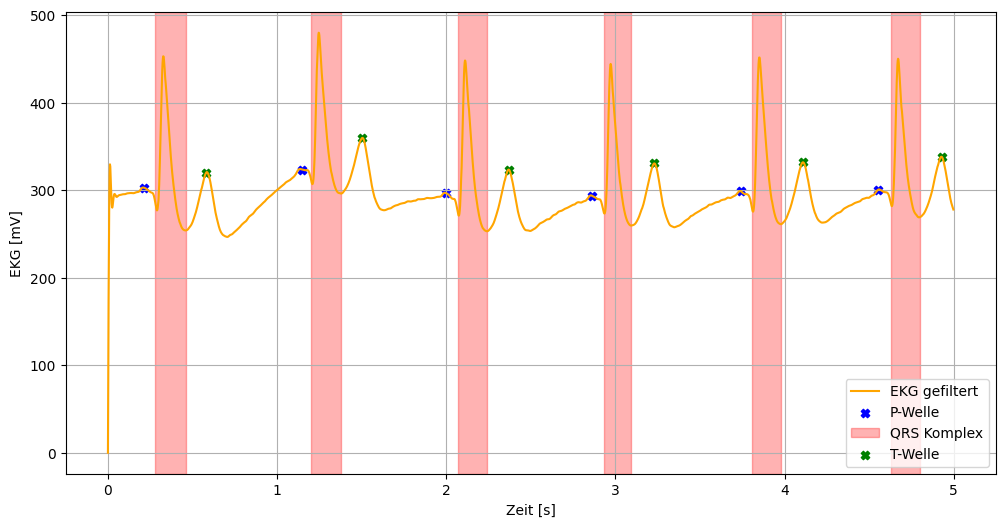

In [6]:
# Annahme: time_03 und ecg_filtered_03 sind definiert
# Daten auf die ersten 5 Sekunden beschränken
time_limit = 5
time_plot_03 = np.where(time_03 < time_limit)[0]
filtered_time = time_03[time_plot_03]
filtered_ecg = ecg_filtered_03[time_plot_03]

# Zeitpunkte für Markierungen
p_wave_times = [0.21, 1.15, 2, 2.86, 3.74, 4.55]  # Beispielzeitpunkte für P-Wellen
qrs_regions = [(0.28, 0.46), (1.2, 1.38), (2.07, 2.24), (2.93,3.09),(3.81, 3.98),(4.63, 4.8)]  # QRS-Bereiche (Start, Ende)
t_wave_times = [0.58, 1.5, 2.37, 3.23, 4.11, 4.93]  # Beispielzeitpunkte für T-Wellen

# Indizes für die Markierung berechnen
p_wave_indices = [np.where(filtered_time >= t)[0][0] for t in p_wave_times]
qrs_start_indices = [np.where(filtered_time >= start)[0][0] for start, _ in qrs_regions]
qrs_end_indices = [np.where(filtered_time <= end)[0][-1] for _, end in qrs_regions]
t_wave_indices = [np.where(filtered_time >= t)[0][0] for t in t_wave_times]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_time, filtered_ecg, label='EKG gefiltert', color='orange')

# P-Wellen markieren
for idx in p_wave_indices:
    plt.scatter(filtered_time[idx], filtered_ecg[idx], color='blue', marker='X', label='P-Welle' if idx == p_wave_indices[0] else None)

# QRS-Komplexe markieren
for start_idx, end_idx in zip(qrs_start_indices, qrs_end_indices):
    plt.axvspan(filtered_time[start_idx], filtered_time[end_idx], color='red', alpha=0.3, label='QRS Komplex' if start_idx == qrs_start_indices[0] else None)

# T-Wellen markieren
for idx in t_wave_indices:
    plt.scatter(filtered_time[idx], filtered_ecg[idx], color='green', marker='X', label='T-Welle' if idx == t_wave_indices[0] else None)

# Labels, Titel und Legende
plt.xlabel('Zeit [s]')
plt.ylabel('EKG [mV]')
plt.legend()
plt.grid(True)
plt.show()


## Identifizieren der R-Zacke

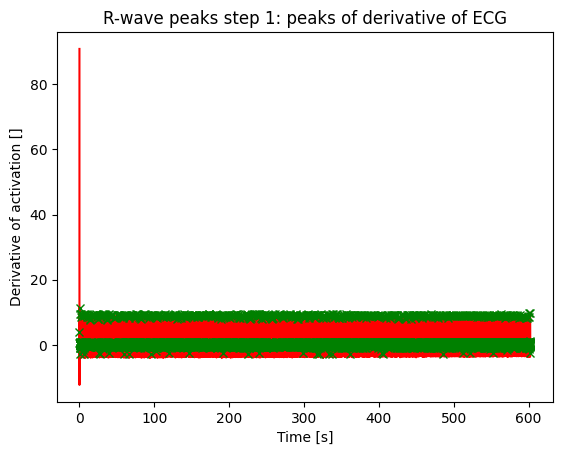

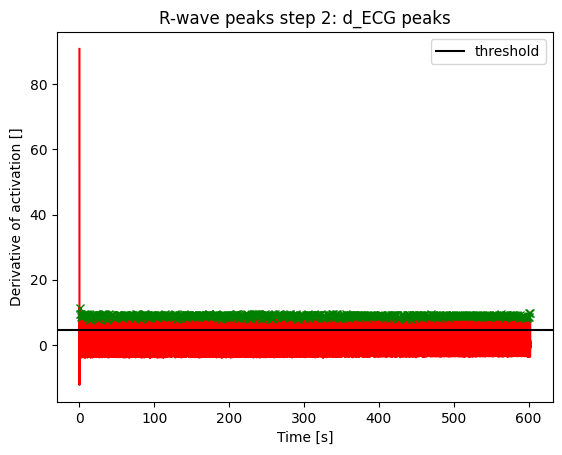

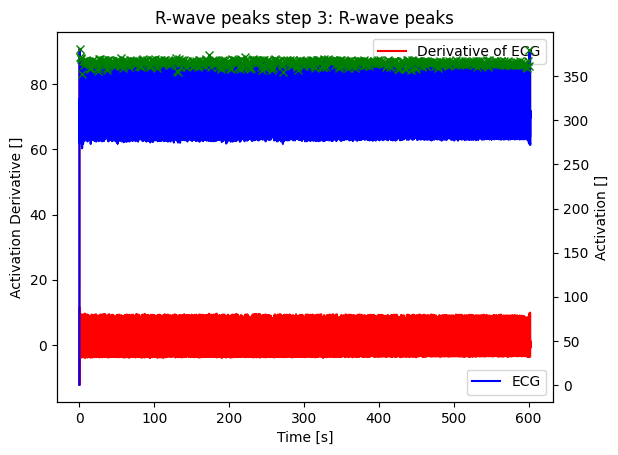

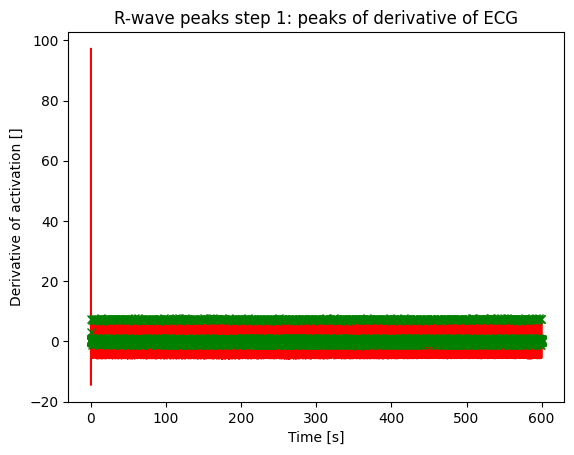

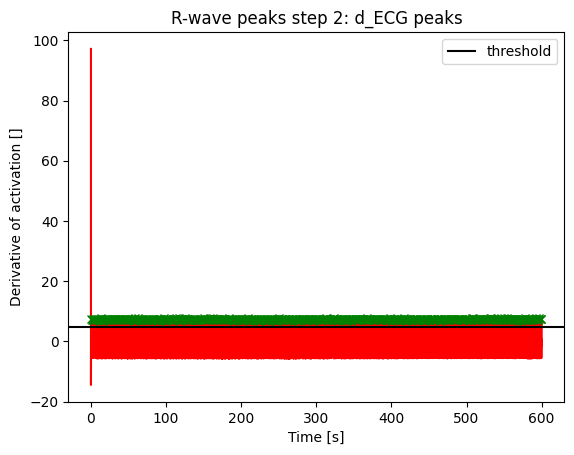

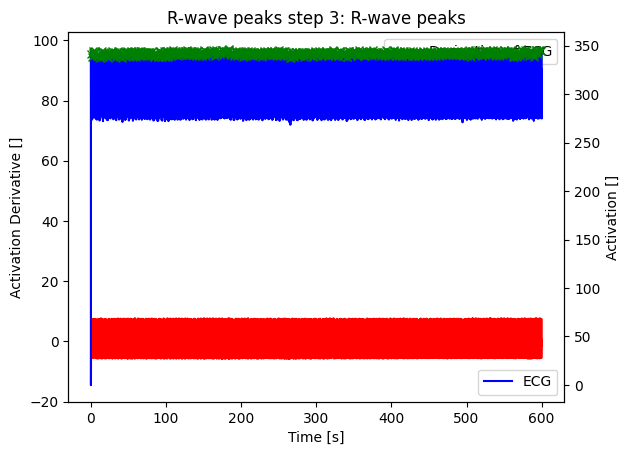

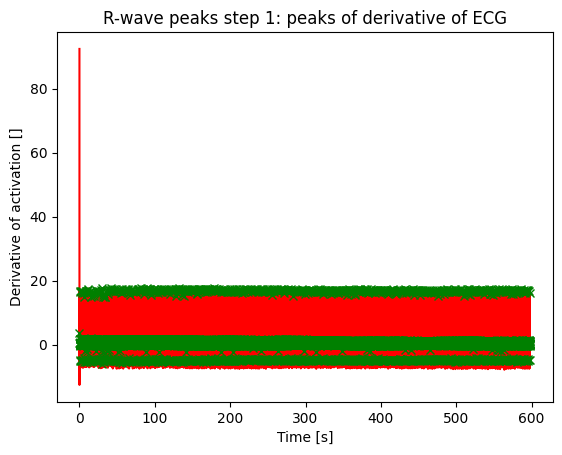

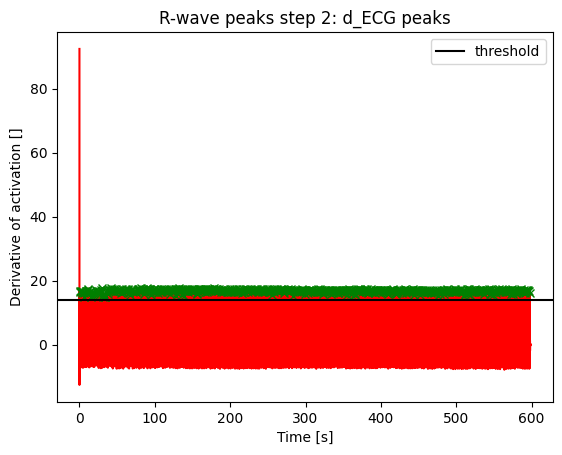

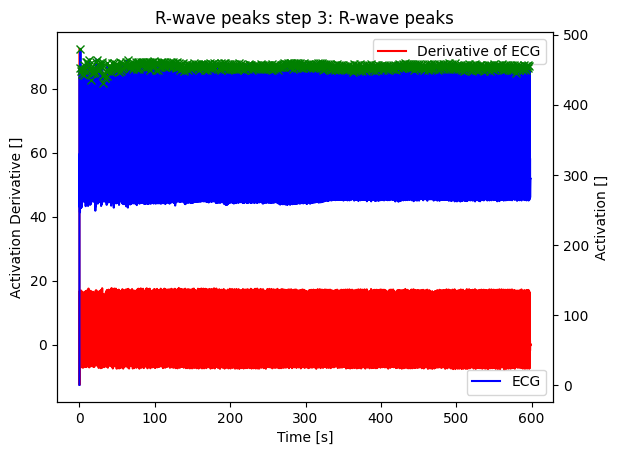

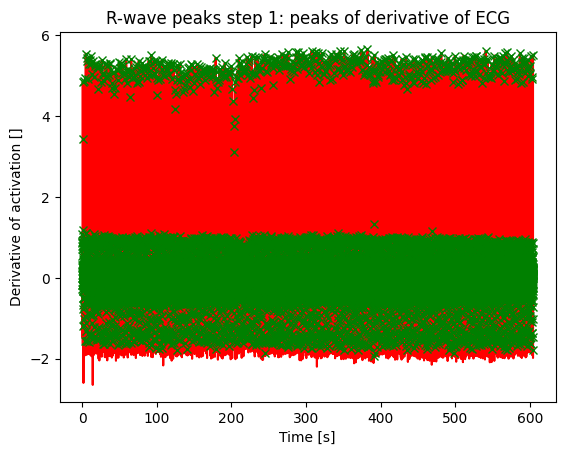

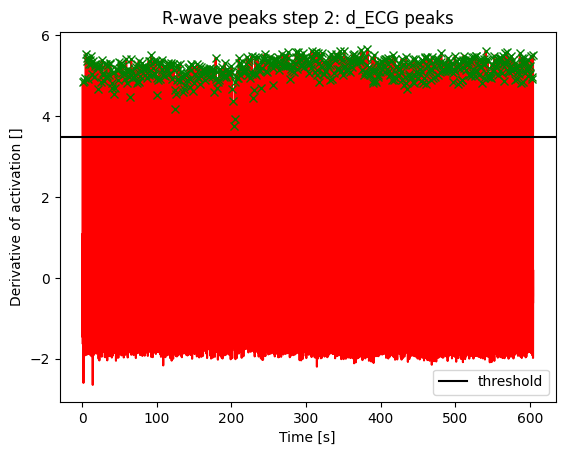

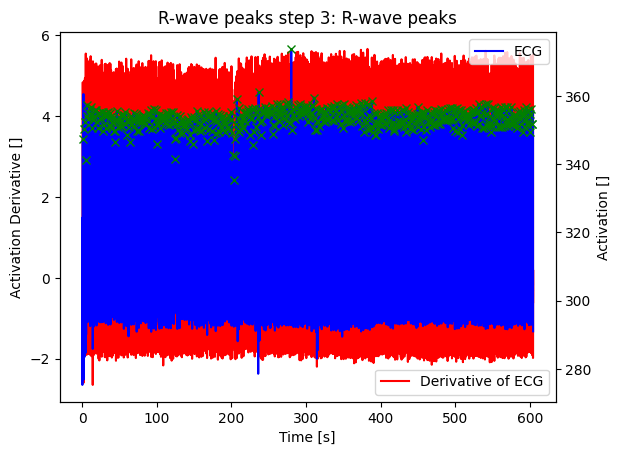

In [7]:
#Markus
d_ecg_01, peaks_d_ecg_01 = ekg.decg_peaks(ecg_filtered_01, time_01)
Rwave_peaks_d_ecg_01 = ekg.d_ecg_peaks(d_ecg_01, peaks_d_ecg_01, time_01, 0.1, 0.4)
Rwave_t_01 = ekg.Rwave_peaks(ecg_filtered_01, d_ecg_01, Rwave_peaks_d_ecg_01, time_01)

#Jannis
d_ecg_02, peaks_d_ecg_02 = ekg.decg_peaks(ecg_filtered_02, time_02)
Rwave_peaks_d_ecg_02 = ekg.d_ecg_peaks(d_ecg_02, peaks_d_ecg_02, time_02, 0.1, 0.4)
Rwave_t_02 = ekg.Rwave_peaks(ecg_filtered_02, d_ecg_02, Rwave_peaks_d_ecg_02, time_02)

#Matti
d_ecg_03, peaks_d_ecg_03 = ekg.decg_peaks(ecg_filtered_03, time_03)
Rwave_peaks_d_ecg_03 = ekg.d_ecg_peaks(d_ecg_03, peaks_d_ecg_03, time_03, 0.3, 0.4)
Rwave_t_03 = ekg.Rwave_peaks(ecg_filtered_03, d_ecg_03, Rwave_peaks_d_ecg_03, time_03)

#Julian
d_ecg_04, peaks_d_ecg_04 = ekg.decg_peaks(ecg_filtered_04, time_04)
Rwave_peaks_d_ecg_04 = ekg.d_ecg_peaks(d_ecg_04, peaks_d_ecg_04, time_04, 1.2, 0.4)
Rwave_t_04 = ekg.Rwave_peaks(ecg_filtered_04, d_ecg_04, Rwave_peaks_d_ecg_04, time_04)

## Aufgabe 5

Text(0.5, 0, 'Zeit [s]')

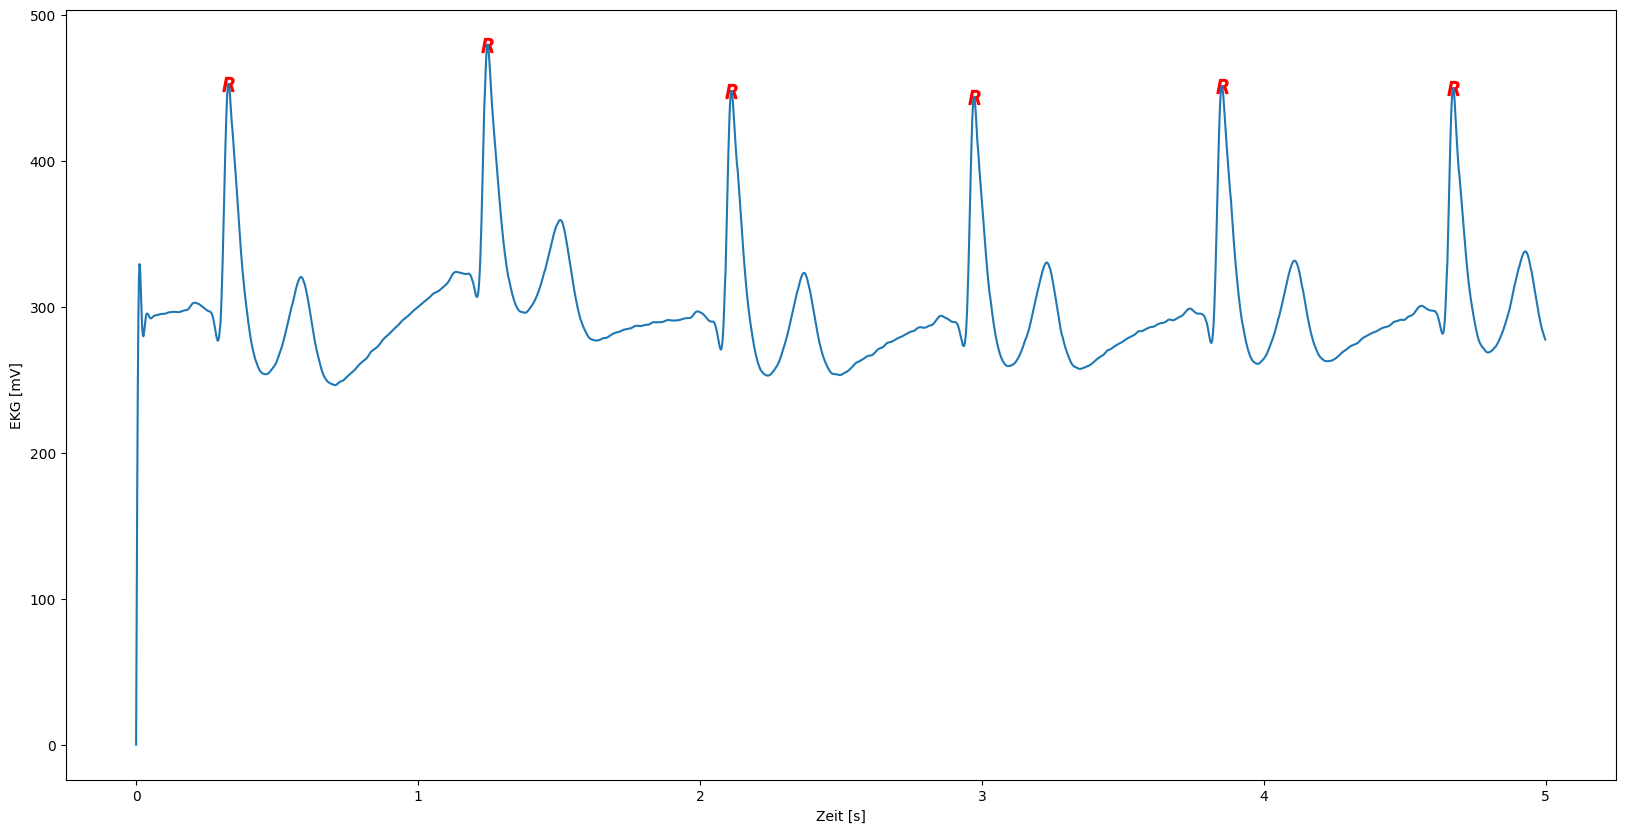

In [8]:
#Markieren der R-Komplexe in Mattis Daten
time_plot = np.where(time_03 < 5)[0]
rtime_plot = np.array([]).astype(int)
for rtime in Rwave_t_03[Rwave_t_03 < 5]: # Bestimmen der Indexe in der Ursprungszeitreihe
    rtime_plot = np.append(rtime_plot, np.where(time_03 == rtime)[0])
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(time_03[time_plot], ecg_filtered_03[time_plot])
ax.scatter(time_03[rtime_plot], ecg_filtered_03[rtime_plot], color='red', marker='$R$',s = 100)
ax.set_ylabel('EKG [mV]')
ax.set_xlabel('Zeit [s]')

## Aufgabe 6

In [9]:
#Markus Puls und HRV
puls_time_01 = np.diff(Rwave_t_01)
puls_mean_01 = 1 / np.mean(puls_time_01) * 60
puls_hrv_01 = np.std(puls_time_01) *1000

#Jannis Puls und HRV
puls_time_02 = np.diff(Rwave_t_02)
puls_mean_02 = 1 / np.mean(puls_time_02) * 60
puls_hrv_02 = np.std(puls_time_02) *1000

#Matti Puls und HRV
puls_time_03 = np.diff(Rwave_t_03)
puls_mean_03 = 1 / np.mean(puls_time_03) * 60
puls_hrv_03 = np.std(puls_time_03) *1000

#Julian Puls und HRV
puls_time_04 = np.diff(Rwave_t_04)
puls_mean_04 = 1 / np.mean(puls_time_04) * 60
puls_hrv_04 = np.std(puls_time_04) *1000

#Tabelle erstellen
data = {'Puls / 1/min': [puls_mean_01, puls_mean_02, puls_mean_03, puls_mean_04], 'HRV / ms': [puls_hrv_01, puls_hrv_02, puls_hrv_03, puls_hrv_04]}
table = pd.DataFrame(data, index=['Markus', 'Jannis', 'Matti', 'Julian'])
print(table)

        Puls / 1/min    HRV / ms
Markus     53.425205  221.168844
Jannis     66.325839   45.103494
Matti      63.278299   58.248464
Julian     61.368335   85.788897


## Aufgabe 7

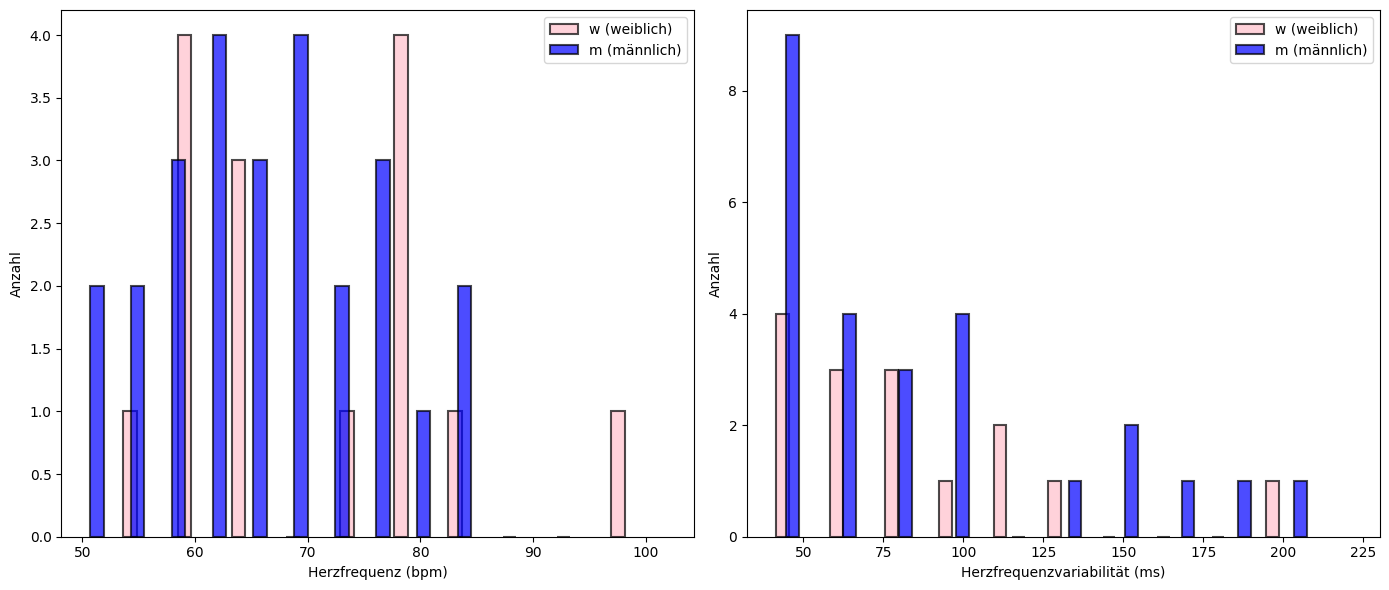

In [28]:
data = pd.read_csv('data/HeartRateData_MGST.csv')

# Drop the 'Name' column to anonymize the data
df = data.drop(columns=['Name'])

# Werte bereinigen
df['Herzfrequenz'] = df['Herzfrequenz'].str.replace(' bpm', '').str.replace(',', '.').astype(float)
df['Herzfrequenzvariabilität'] = df['Herzfrequenzvariabilität'].str.replace(' ms', '').str.replace(',', '.').astype(float)

# Plots erstellen mit Unterscheidung nach Geschlecht
plt.figure(figsize=(14, 6))

# Farben für Geschlechter
colors = {'m': 'blue', 'w': 'pink'}

# Histogramm für Herzfrequenz mit Geschlecht
plt.subplot(1, 2, 1)
for gender in df['Geschlecht'].unique():
    plt.hist(df[df['Geschlecht'] == gender]['Herzfrequenz'], 
             bins=10, alpha=0.7, label=f"{gender} ({'männlich' if gender == 'm' else 'weiblich'})", 
             color=colors[gender], edgecolor='black', linewidth=1.5, width=1.2)
#plt.title('Histogramm der Herzfrequenz (m/w)')
plt.xlabel('Herzfrequenz (bpm)')
plt.ylabel('Anzahl')
plt.legend()

# Histogramm für Herzfrequenzvariabilität mit Geschlecht
plt.subplot(1, 2, 2)
for gender in df['Geschlecht'].unique():
    plt.hist(df[df['Geschlecht'] == gender]['Herzfrequenzvariabilität'], 
             bins=10, alpha=0.7, label=f"{gender} ({'männlich' if gender == 'm' else 'weiblich'})", 
             color=colors[gender], edgecolor='black', linewidth=1.5, width=4)
#plt.title('Histogramm der Herzfrequenzvariabilität (m/w)')
plt.xlabel('Herzfrequenzvariabilität (ms)')
plt.ylabel('Anzahl')
plt.legend()

plt.tight_layout()
plt.show()

## Aufgabe 8

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\janni\AppData\Local\Temp\ipykernel_24700\3307317886.py:2: SyntaxWarning: invalid escape sequence '\B'
  df_stress_0 = pd.read_csv('data\BelastungsEKG_Flo.csv', sep = ';')


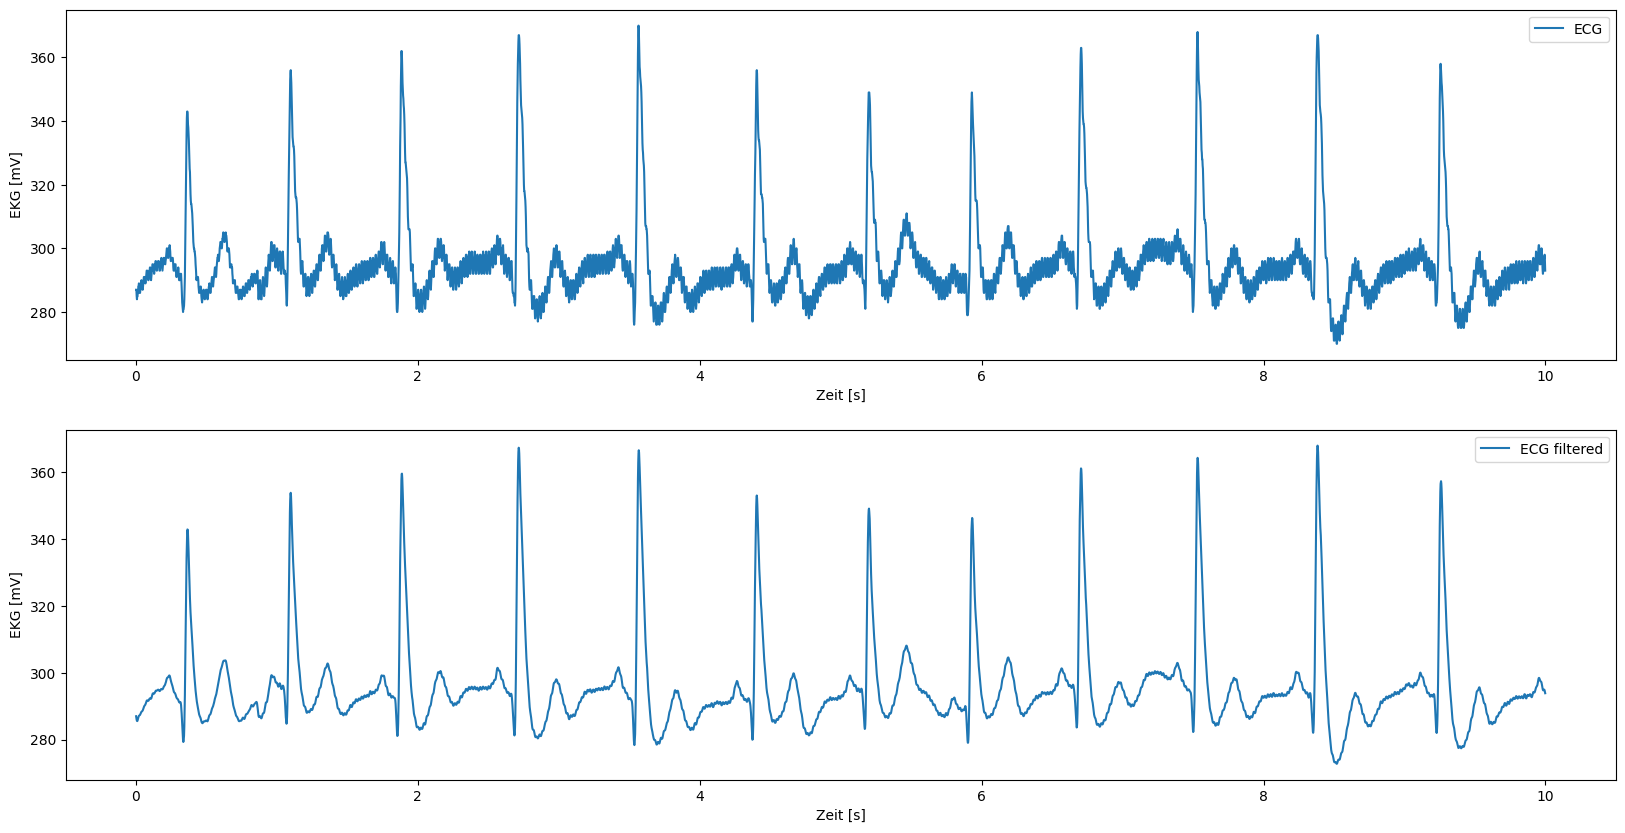

In [11]:
#Daten andere Gruppe
df_stress_0 = pd.read_csv('data\BelastungsEKG_Flo.csv', sep = ';')
df_stress = df_stress_0.dropna()
time_stress = df_stress['time'] / 1000
ecg_stress = df_stress['mV']

def butter_lowpass_filter(Wn, ecg): # Wn = 2*fg / fs)
    b , a = sps.butter(4, Wn, 'low', analog=False) 
    ecg_filtered = sps.filtfilt(b, a, ecg)
    return ecg_filtered

ecg_filtered_stress = butter_lowpass_filter(0.16, ecg_stress) 
#plot ersten 10 sekunden von ekg_stress
time_plot = np.where(time_stress < 10)[0]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax1.plot(time_stress[time_plot], ecg_stress[time_plot], label='ECG')
ax2.plot(time_stress[time_plot], ecg_filtered_stress[time_plot], label='ECG filtered')
ax1.set_ylabel('EKG [mV]')
ax1.set_xlabel('Zeit [s]')
ax2.set_ylabel('EKG [mV]')
ax2.set_xlabel('Zeit [s]')
ax1.legend()
ax2.legend()
plt.show()

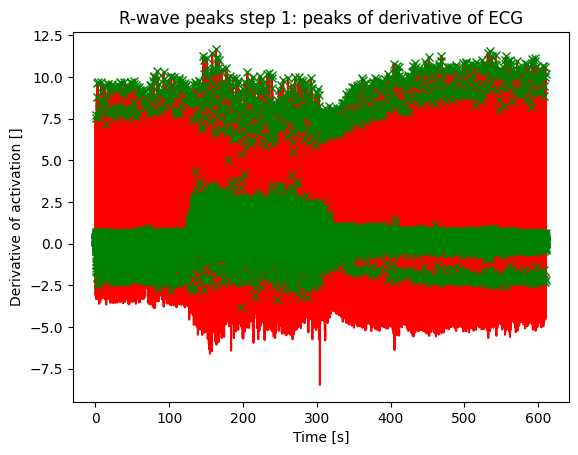

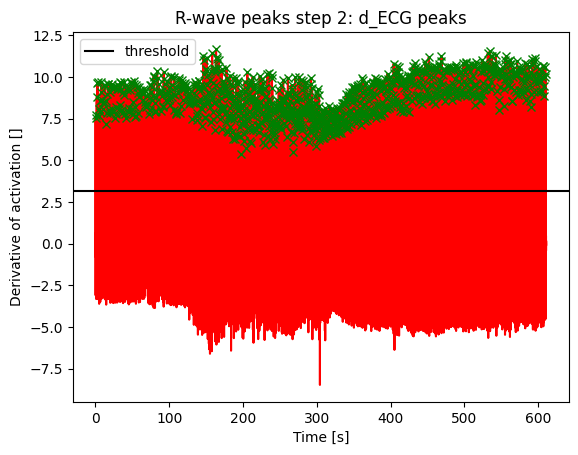

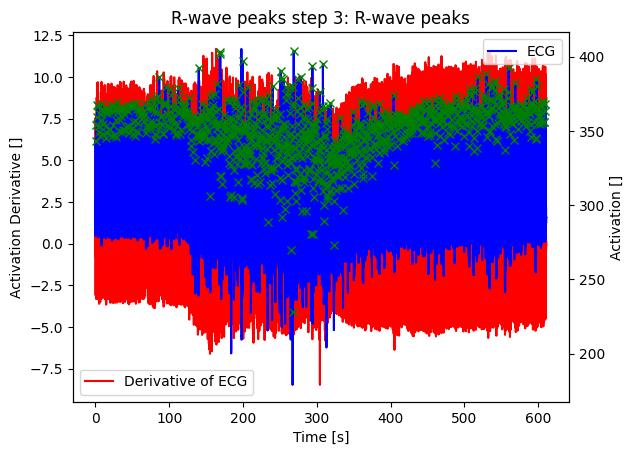

In [12]:
#Herzfrequenz über die gesamte zeit als plot
d_ecg_stress, peaks_d_ecg_stress = ekg.decg_peaks(ecg_filtered_stress, time_stress)
Rwave_peaks_d_ecg_stress = ekg.d_ecg_peaks(d_ecg_stress, peaks_d_ecg_stress, time_stress, 0.5, 0.6)
Rwave_t_stress = ekg.Rwave_peaks(ecg_filtered_stress, d_ecg_stress, Rwave_peaks_d_ecg_stress, time_stress)

111.57285224721315 146.72051819306546
[81.86 76.05 72.46 ... 93.17 88.63 89.55]


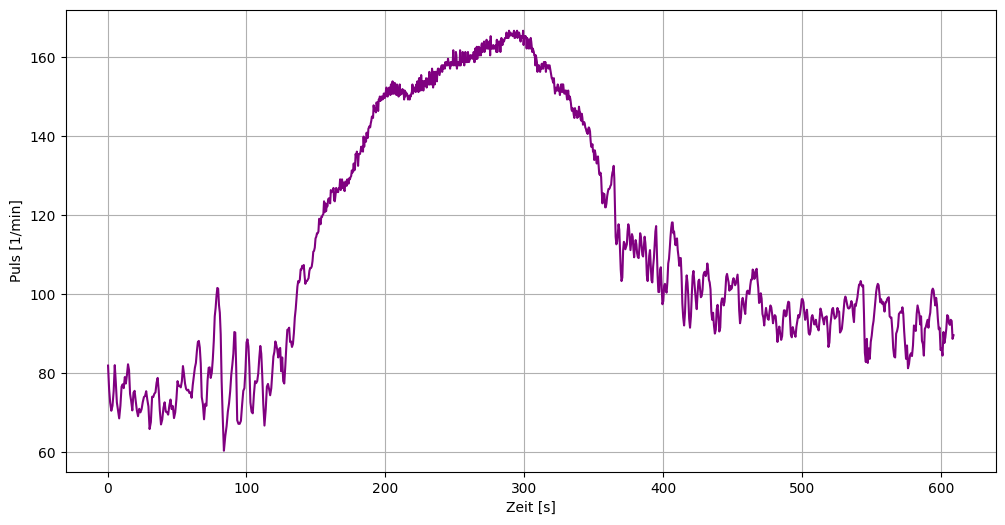

In [13]:
puls_time_stress = np.diff(Rwave_t_stress)
puls_mean_stress = 1 / np.mean(puls_time_stress) * 60
puls_hrv_stress = np.std(puls_time_stress) *1000
print(puls_mean_stress, puls_hrv_stress)
puls_stress = np.array([round(1 / t * 60, 2) for t in puls_time_stress])
print(puls_stress)

# Plot Puls über die gesamte Zeit
plt.figure(figsize=(12, 6))
plt.plot(Rwave_t_stress[:-1], puls_stress, color='purple')
plt.xlabel('Zeit [s]')
plt.ylabel('Puls [1/min]')
plt.grid(True)
plt.show()

## Aufgabe 9

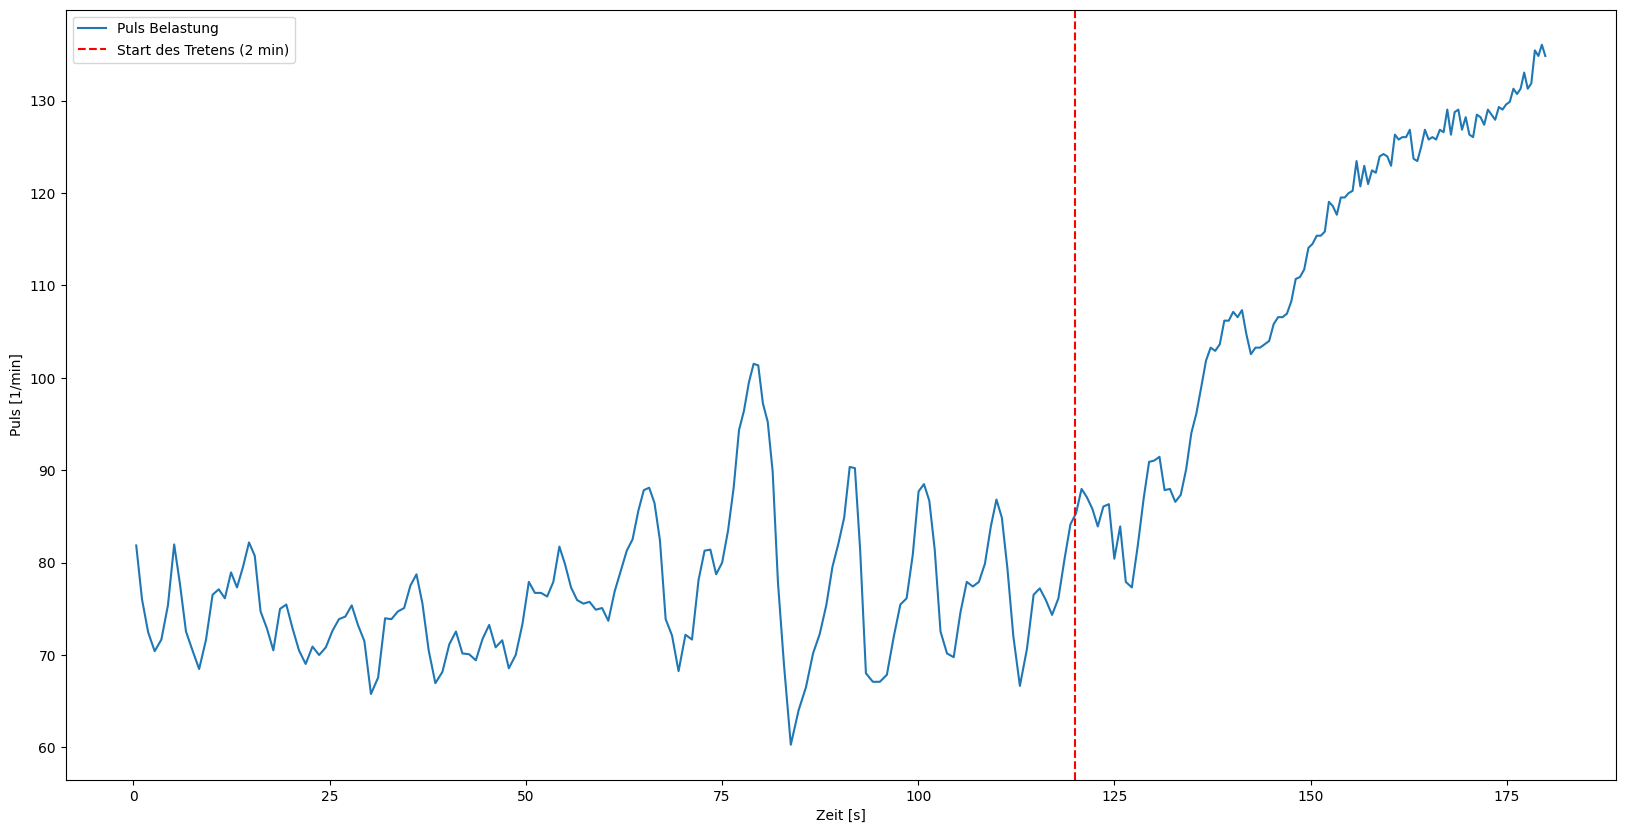

In [14]:
# Plot the first three minutes of the stress pulse data
time_limit = 180  # 3 minutes
time_plot = np.where(Rwave_t_stress < time_limit)[0]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(Rwave_t_stress[time_plot], puls_stress[time_plot], label='Puls Belastung')
ax.axvline(x=120, color='red', linestyle='--', label='Start des Tretens (2 min)')
ax.set_ylabel('Puls [1/min]')
ax.set_xlabel('Zeit [s]')
ax.legend()
plt.show()

## Aufgabe 10

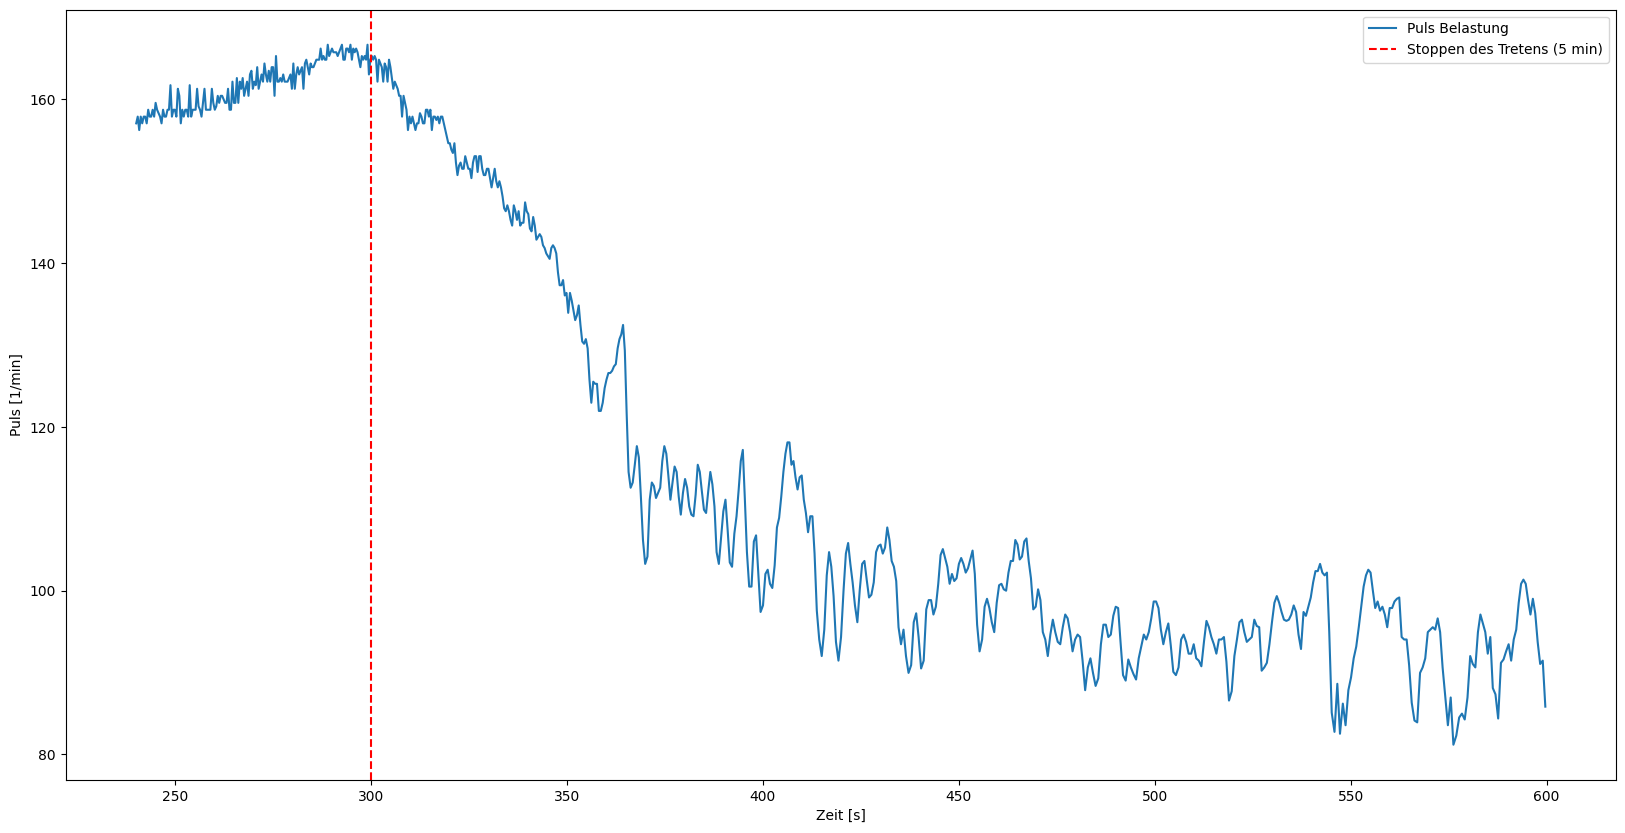

In [15]:
# Define the time window for plotting (minute 4 to 10)
start_time = 4 * 60  # 4 minutes in seconds
end_time = 10 * 60  # 10 minutes in seconds
time_plot = np.where(np.logical_and(Rwave_t_stress >= start_time, Rwave_t_stress <= end_time))[0]

# Plot the pulse data for the defined time window
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(Rwave_t_stress[time_plot], puls_stress[time_plot], label='Puls Belastung')
ax.axvline(x=5 * 60, color='red', linestyle='--', label='Stoppen des Tretens (5 min)')
ax.set_ylabel('Puls [1/min]')
ax.set_xlabel('Zeit [s]')
ax.legend()
plt.show()

## Aufgabe 12

Metabolischer Energieverbrauch bei niedriger Aktivität: 1.1998991226740463 kcal/min Auf eine Stunde: 71.99394736044277 kcal/h
Metabolischer Energieverbrauch bei hoher Aktivität: 8.004389483563076 kcal/min Auf eine Stunde: 480.26336901378454 kcal/h
Durchschnittlicher metabolischer Energieverbrauch: 7.283702066699276 kcal/min Auf eine Stunde: 437.02212400195657 kcal/h
Relativer Unterschied: 85.00948604340124 %


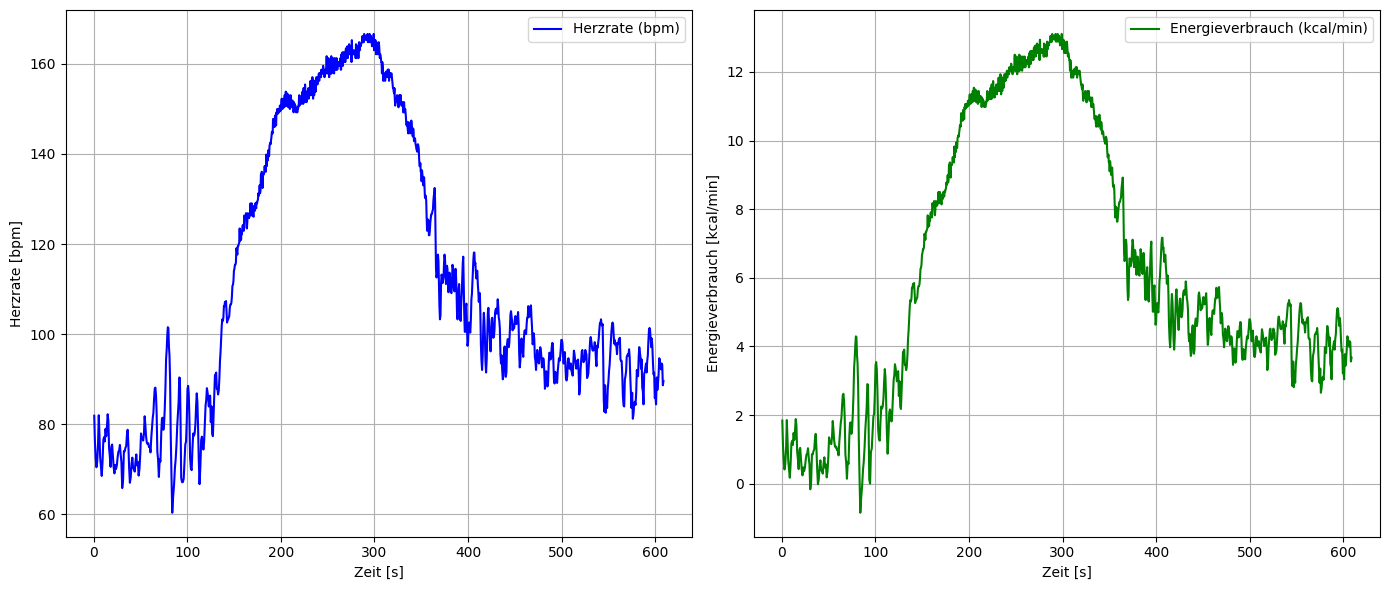

In [31]:
#Berechnen von HRnet:
HR_activity = 1 / puls_time_stress * 60 #Herzfrequenz über die Zeit
HR_rest = 1 / np.mean(puls_time_stress[:100]) * 60 #Mittelwert der ersten 100 Pulsschläge entspricht Ruhepuls
HRnet = HR_activity - HR_rest
weight = 85 #Gewicht in kg

#Trennen in low & hight activity:
EE_low = 0.438 + 0.0210 * HRnet[:120] + 0.00750 * weight + 0.00122 * weight * HRnet[:120]
EE_high = 1.012 - 0.0154 * HRnet[120:] + 0.01140 *weight + 0.00162 * weight * HRnet[120:]
#Zusammenfügen zu einem Array
EE_gesamt = np.concatenate((EE_low, EE_high))
#Berechnen des durchschnittlichen Energieverbrauchs in kcal/min
EV_low = np.mean(EE_low)
EV_high = np.mean(EE_high)
EV_gesamt = np.mean(EE_gesamt)
#Berechnen der relativen Änderung von niedriger Aktivität zu hoher Aktivität
relative_change = (EV_high - EV_low) / EV_high * 100

print('Metabolischer Energieverbrauch bei niedriger Aktivität:', EV_low, 'kcal/min', 'Auf eine Stunde:', EV_low * 60, 'kcal/h')
print('Metabolischer Energieverbrauch bei hoher Aktivität:', EV_high, 'kcal/min', 'Auf eine Stunde:', EV_high * 60, 'kcal/h')
print('Durchschnittlicher metabolischer Energieverbrauch:', EV_gesamt, 'kcal/min', 'Auf eine Stunde:', EV_gesamt * 60, 'kcal/h')
print('Relativer Unterschied:', relative_change, '%')
# Plotting the energy expenditure
# Plotting the heart rate in bpm over time
plt.figure(figsize=(14, 6))

# Plot heart rate
plt.subplot(1, 2, 1)
plt.plot(Rwave_t_stress[:-1], HR_activity, label='Herzrate (bpm)', color='blue')
plt.xlabel('Zeit [s]')
plt.ylabel('Herzrate [bpm]')
#plt.title('Herzrate über die Zeit')
plt.legend()
plt.grid(True)

# Plot energy expenditure
plt.subplot(1, 2, 2)
plt.plot(Rwave_t_stress[:-1], EE_gesamt, label='Energieverbrauch (kcal/min)', color='green')
plt.xlabel('Zeit [s]')
plt.ylabel('Energieverbrauch [kcal/min]')
#plt.title('Energieverbrauch über die Zeit')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Aufgabe 13

In [17]:
#Berechnen der Gesamtenergie in kcal und relative Änderung
total_energy_kcal = np.sum(EE_gesamt * puls_time_stress / 60) # /60 um von 1 / min auf 1 / s zu kommen & * puls_time_stress um die Zeit zwischen den Schlägen zu berücksichtigen
total_energy_joule = total_energy_kcal * 4184  # Joule
total_energy_calories = total_energy_kcal * 1000  # Kalorien
ritter_sport = total_energy_kcal / 563  # Rittersport Tafeln
beer_units = total_energy_kcal / 150  # Bierflaschen

# Berechnung des täglichen Kalorienbedarfs (z. B. Harris-Benedict-Formel)
# Beispielwerte: Alter = 25, Gewicht = 70 kg, Größe = 175 cm, Aktivitätsfaktor = 1.55
weight = 85  # Gewicht in kg
height = 185  # Größe in cm
age = 25  # Alter in Jahren
activity_factor = 1.55  # Beispiel: moderat aktive Person
bmr = 10 * weight + 6.25 * height - 5 * age + 5  # Grundumsatz (Männer)
daily_calorie_need = bmr * activity_factor  # Gesamtkalorienbedarf

# Anteil des Experiments am täglichen Kalorienbedarf
percent_of_daily_need = (total_energy_kcal / daily_calorie_need) * 100

# Ergebnisse ausgeben
print(f"Gesamter Energieverbrauch: {total_energy_kcal:.2f} kcal")
print(f"Entspricht: {total_energy_joule:.2f} J")
print(f"Entspricht: {total_energy_calories:.2f} cal")
print(f"Entspricht: {ritter_sport:.2f} Rittersport-Tafeln")
print(f"Entspricht: {beer_units:.2f} Bierflaschen")
print(f"Anteil am täglichen Kalorienbedarf: {percent_of_daily_need:.2f} %")

Gesamter Energieverbrauch: 63.23 kcal
Entspricht: 264572.67 J
Entspricht: 63234.39 cal
Entspricht: 0.11 Rittersport-Tafeln
Entspricht: 0.42 Bierflaschen
Anteil am täglichen Kalorienbedarf: 2.16 %
